In [1]:
# Import other modules not related to PySpark
import matplotlib.pyplot as plt
import numpy as np
import sweetviz as sv
from IPython.core.interactiveshell import InteractiveShell
import statistics as stats
# This helps auto print out the items without explixitly using 'print'
InteractiveShell.ast_node_interactivity = "all" 

/home/tuanth/miniconda3/envs/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pyspark
import pyspark.pandas as ps
from pyspark.rdd import RDD
from pyspark.sql import Row
from pyspark.sql import DataFrame
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql import functions
from pyspark.sql.functions import lit, desc, col, size, array_contains\
, isnan, udf, hour, array_min, array_max, countDistinct, mean, stddev
from pyspark.sql.types import *

/home/tuanth/miniconda3/envs/venv/lib/python3.12/site-packages/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


In [3]:
MAX_MEMORY = '15G'
# Initialize a spark session.
conf = pyspark.SparkConf().setMaster("local[*]") \
        .set('spark.executor.heartbeatInterval', 10000) \
        .set('spark.network.timeout', 10000) \
        .set("spark.core.connection.ack.wait.timeout", "3600") \
        .set("spark.executor.memory", MAX_MEMORY) \
        .set("spark.driver.memory", MAX_MEMORY)
        
def init_spark():
    spark = SparkSession \
        .builder \
        .appName("transaction_data") \
        .config(conf=conf) \
        .getOrCreate()
    return spark

In [21]:
spark = init_spark()
filename_data = './transaction_data.csv'
df = spark.read.csv(filename_data, inferSchema=True, header=True)

print('Data overview')
df.printSchema()

Data overview
root
 |-- UserId: integer (nullable = true)
 |-- TransactionId: integer (nullable = true)
 |-- TransactionTime: string (nullable = true)
 |-- ItemCode: integer (nullable = true)
 |-- ItemDescription: string (nullable = true)
 |-- NumberOfItemsPurchased: integer (nullable = true)
 |-- CostPerItem: double (nullable = true)
 |-- Country: string (nullable = true)



In [36]:
print('Data frame describe (string and numeric columns only)')
df.describe().toPandas()

print(f'Total {df.count()} rows')
df.limit(5).toPandas()

Data frame describe (string and numeric columns only)


,summary,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,CostPerItem_z_score,NumberOfItemsPurchased_z_score_z_score
0,count,390899,390899,390899,390899,390899,390899,390899,390899,390899,390899
1,mean,321183.03125871386,6166550.722800518,None,645902.792017887,None,35.515110041212694,8.336029281221165,None,2.4839830525369657E-6,-0.00735424574217151
2,stddev,35908.85832557343,143961.41362523884,None,432892.77510918054,None,78.20947642372784,2713.10566263961,None,1.0004897743788168,0.14333176521232263
3,min,259287,5900015,Fri Apr 06 06:15:00 IST 2018,42,4 PURPLE FLOCK DINNER CANDLES,3,0.0,Australia,-0.0030715253228253882,-0.06694354784963366
4,max,384027,6397457,Wed Sep 26 13:29:00 IST 2018,1894494,ZINC WIRE SWEETHEART LETTER TRAY,1656,1696285.44,Unspecified,625.5222297991108,2.9624515936333538


Total 390899 rows


,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,CostPerItem_z_score,NumberOfItemsPurchased_z_score_z_score
0,274869,6086872,Sat Jul 28 09:41:00 IST 2018,472521,PICNIC BASKET WICKER LARGE,6,13.74,United Kingdom,0.001995,-0.061446
1,346080,6249672,Fri Dec 07 07:40:00 IST 2018,1783866,ANTIQUE SILVER T-LIGHT GLASS,216,1.47,United Kingdom,-0.002529,0.323414
2,288582,5960405,Fri Apr 06 10:59:00 IST 2018,1732164,WOOD BLACK BOARD ANT WHITE FINISH,3,8.91,United Kingdom,0.000214,-0.066944
3,313131,6255194,Mon Dec 10 08:20:00 IST 2018,1785294,RED RETROSPOT UMBRELLA,18,8.22,EIRE,-0.000040,-0.039454
4,271236,5960218,Fri Apr 06 06:43:00 IST 2018,478674,SWEETHEART WIRE MAGAZINE RACK,9,10.98,United Kingdom,0.000977,-0.055948


In [22]:
# fill -1 with None
df = df.na.replace(to_replace={-1: None})
print("df length before cleaning: ", df.count())

# drop duplicate
df = df.drop_duplicates()
print("df length after drop duplicates: ", df.count())

# drop NA
df = df.na.drop()
print("df length after drop na: ", df.count())

# drop NumberOfItemsPurchased <= 0
df = df.filter(col("NumberOfItemsPurchased") > 0)
print("df length after drop non-positive NumberOfItemsPurchased: ", df.count())

df length before cleaning:  1083818
df length after drop duplicates:  536572


df length after drop na:  399788
df length after drop non-positive NumberOfItemsPurchased:  391282


Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



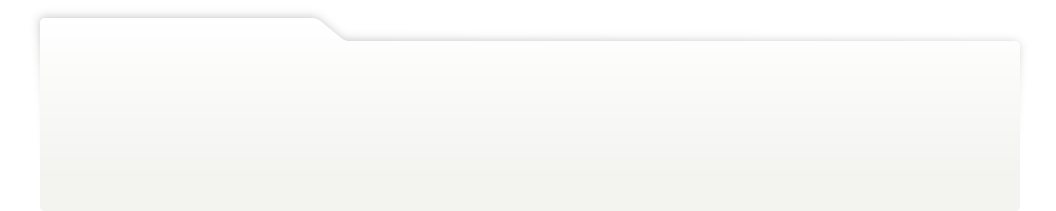
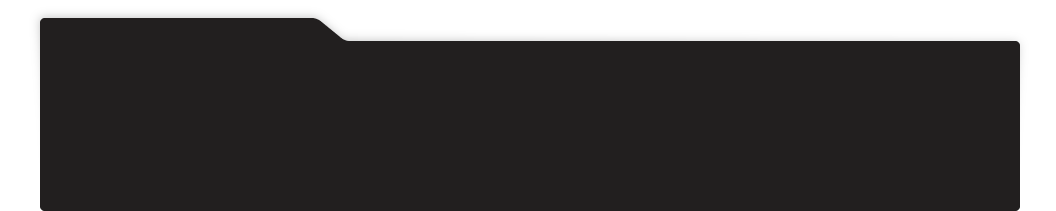
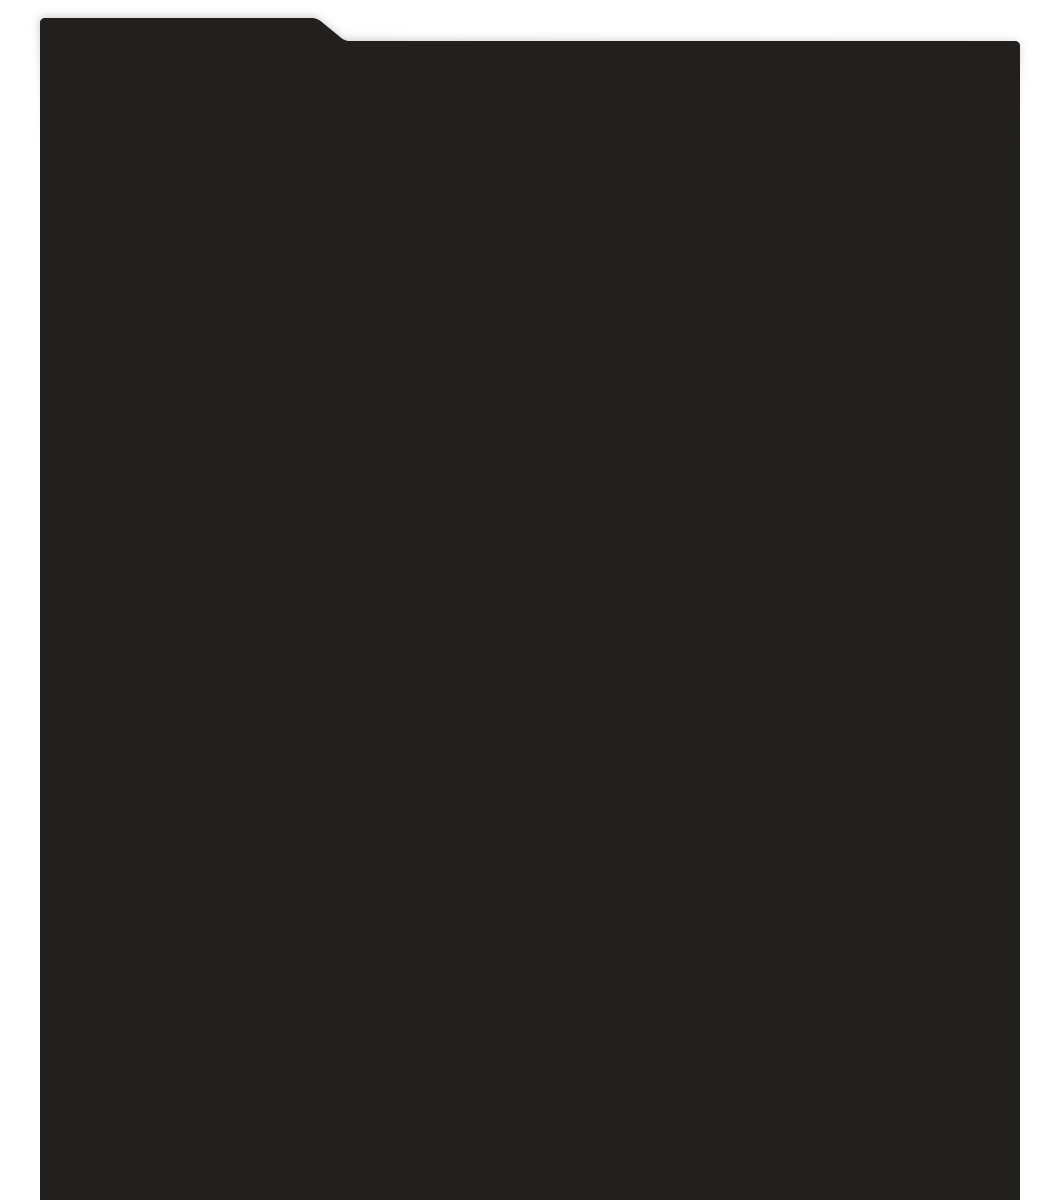
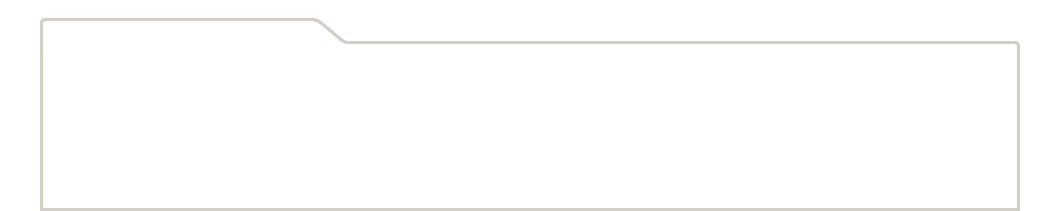
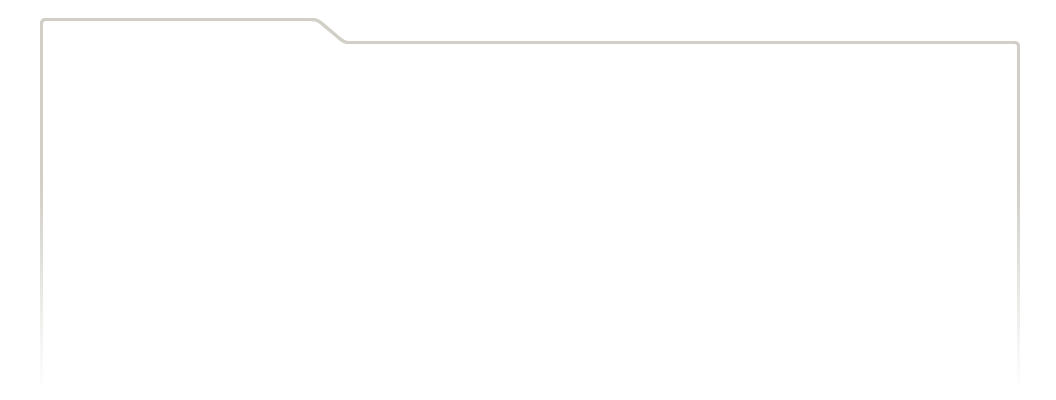
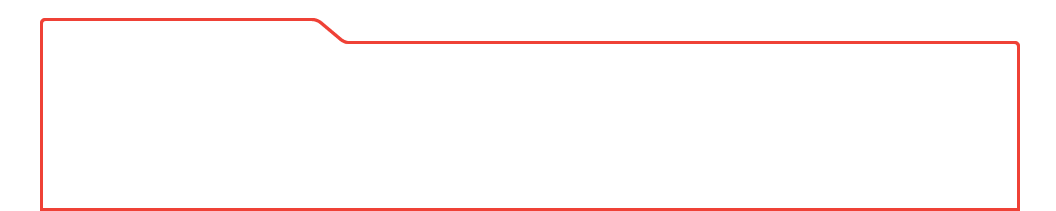
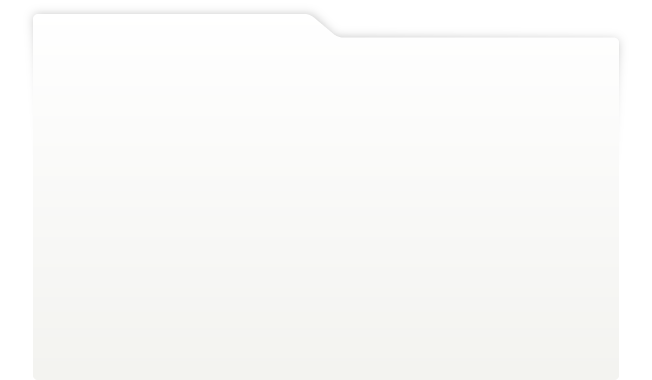
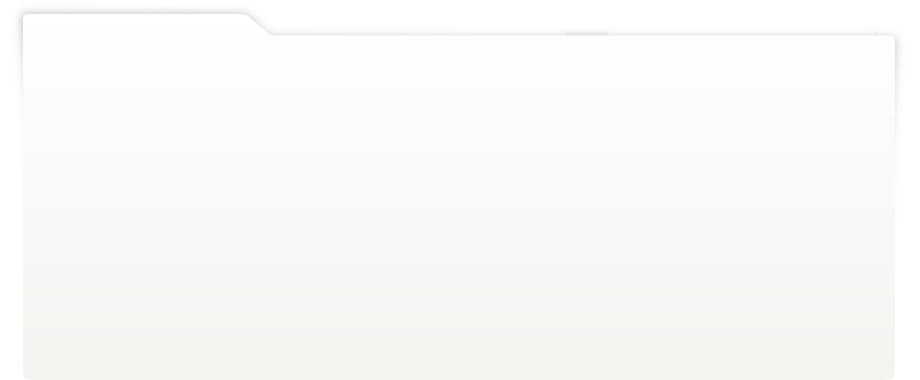
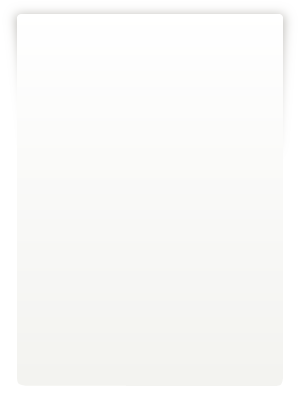
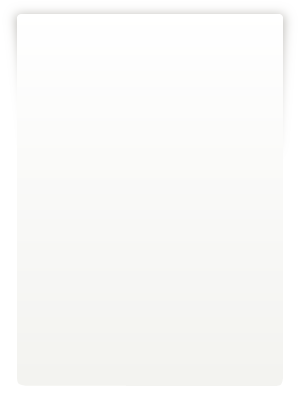
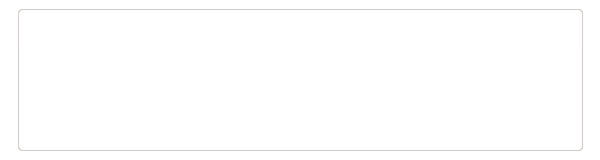
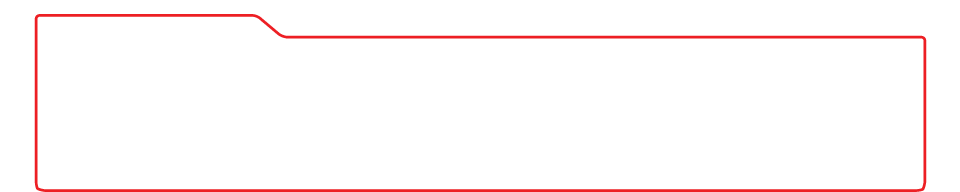
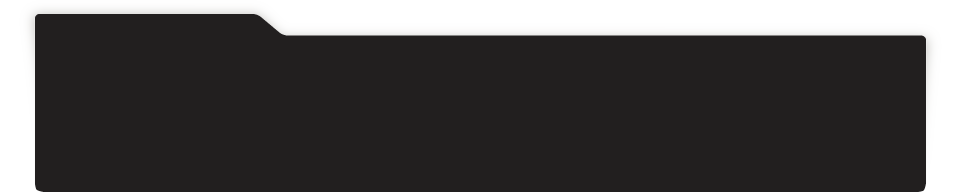
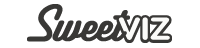
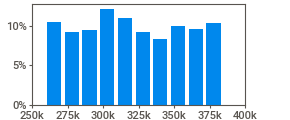
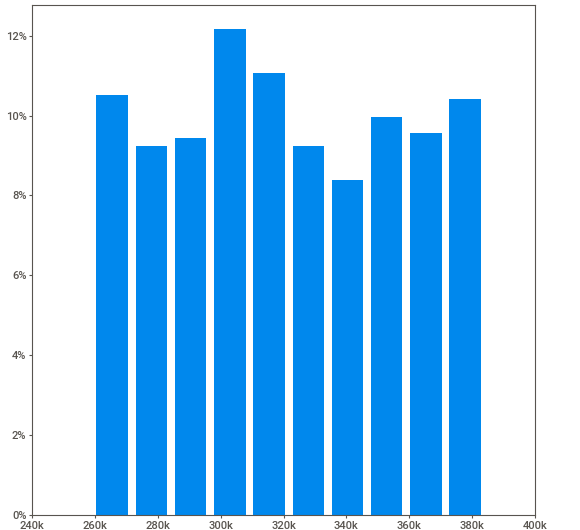
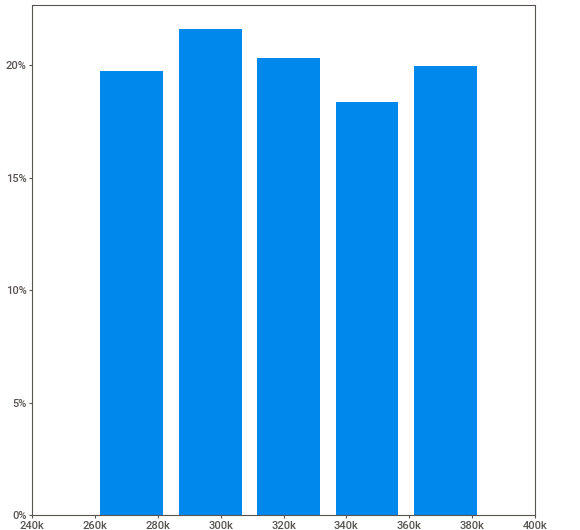
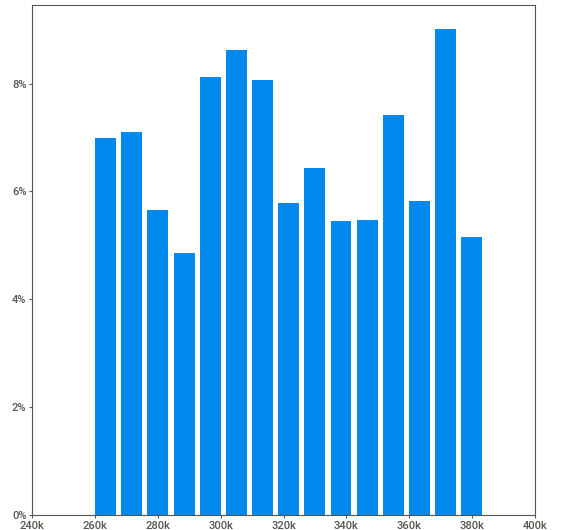
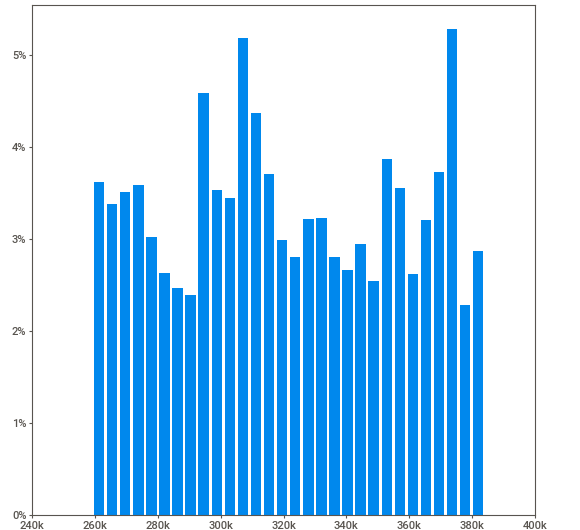
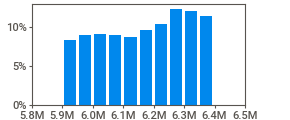
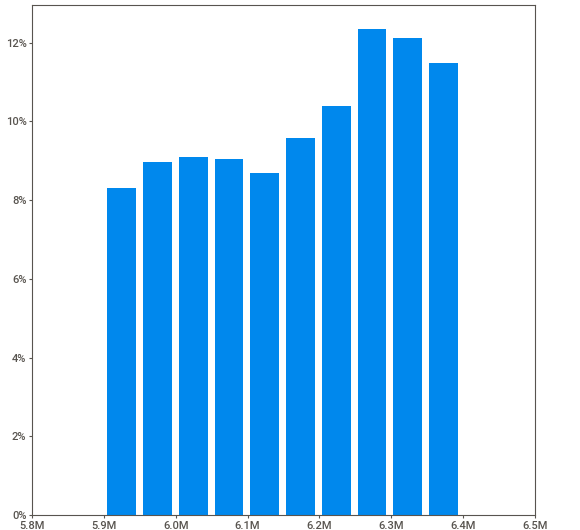
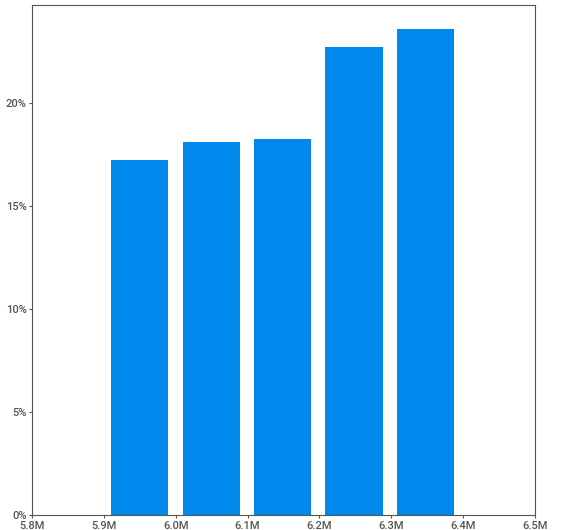
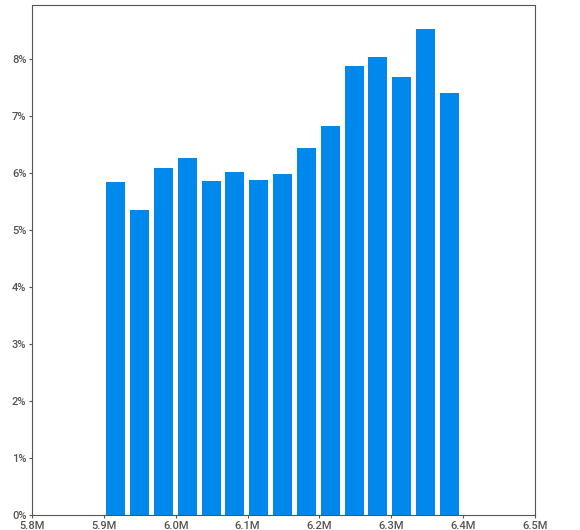
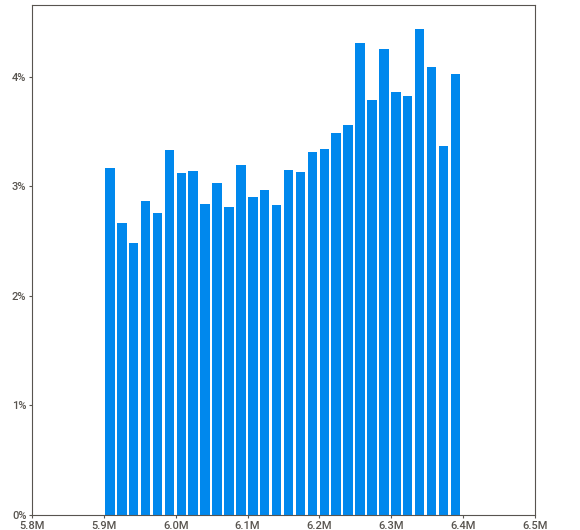
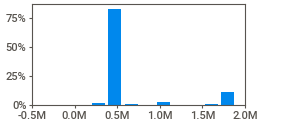
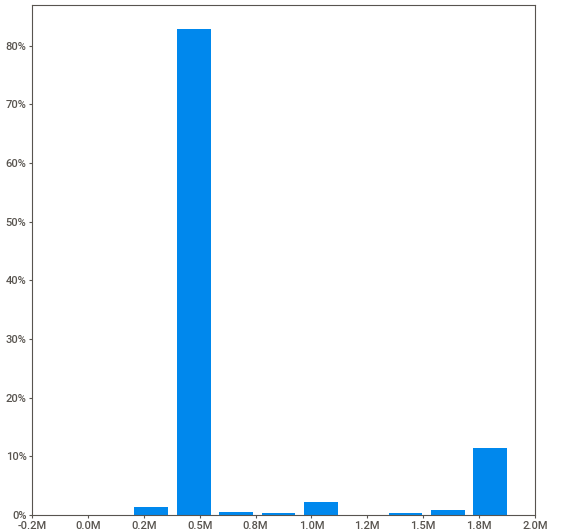
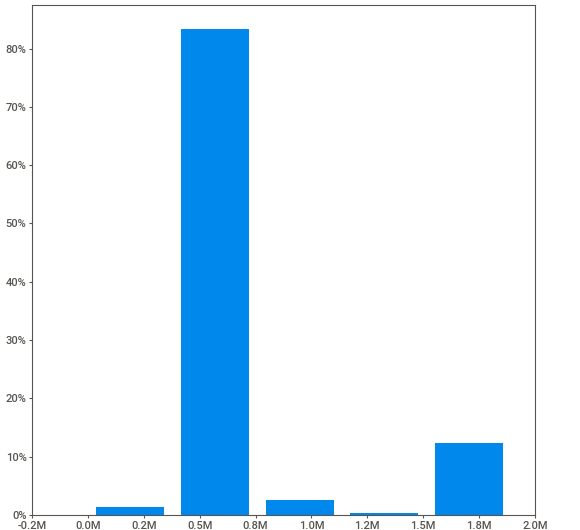
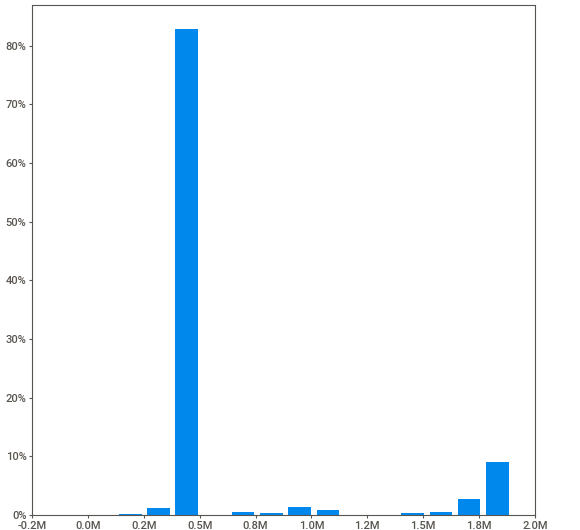
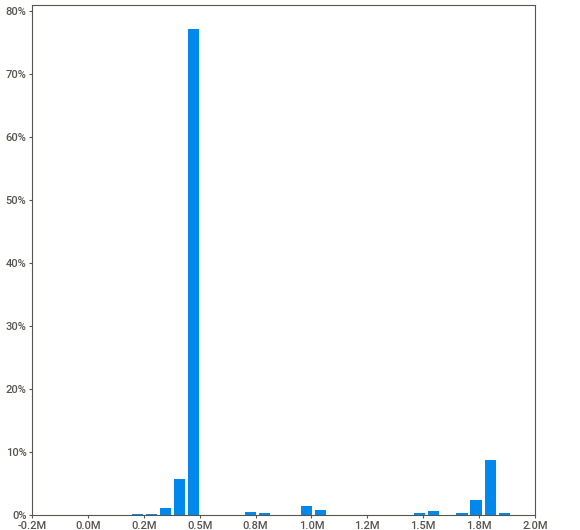
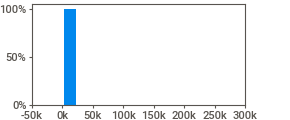
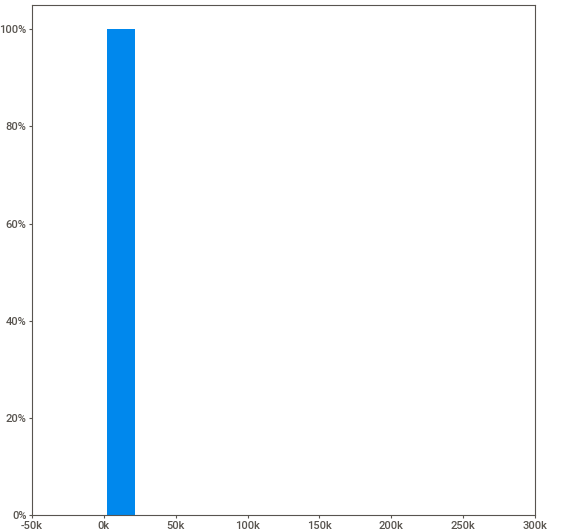
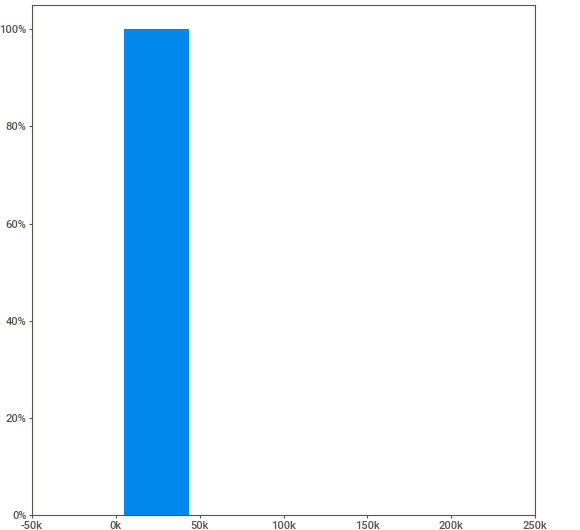
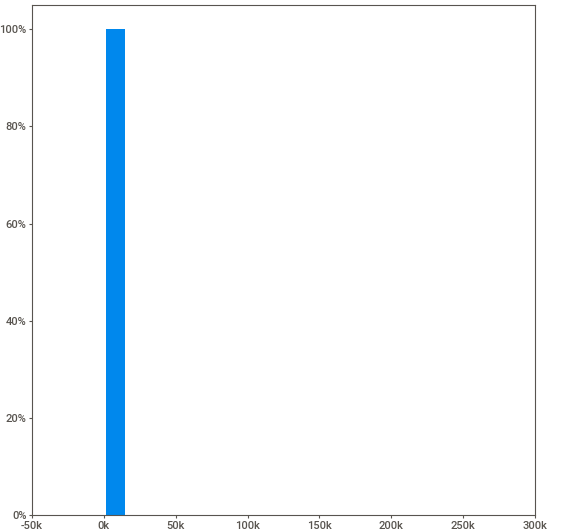
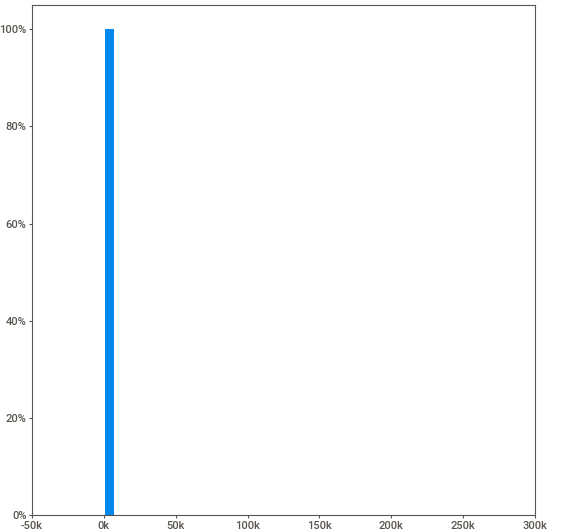
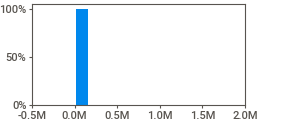
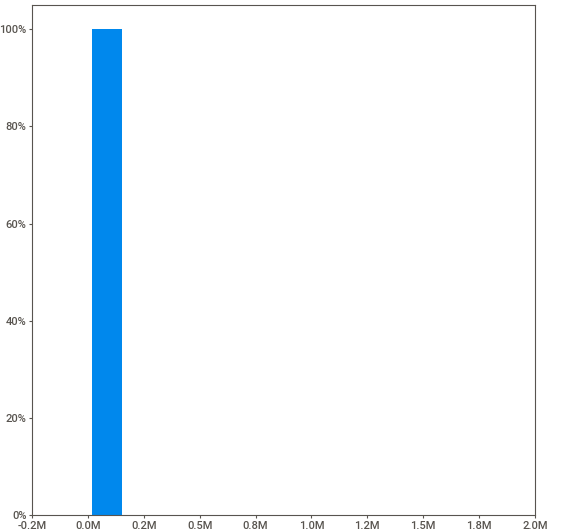
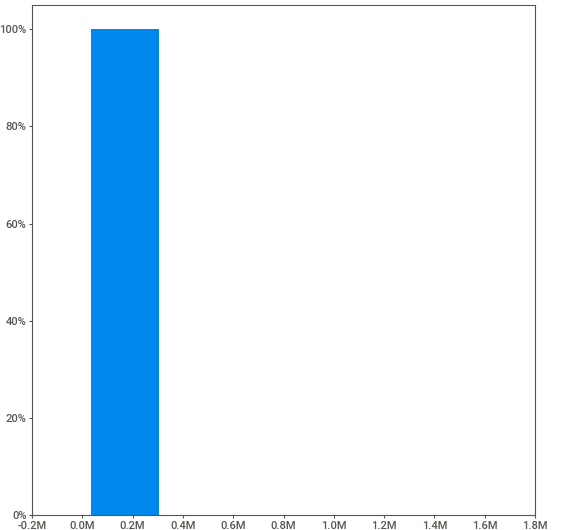
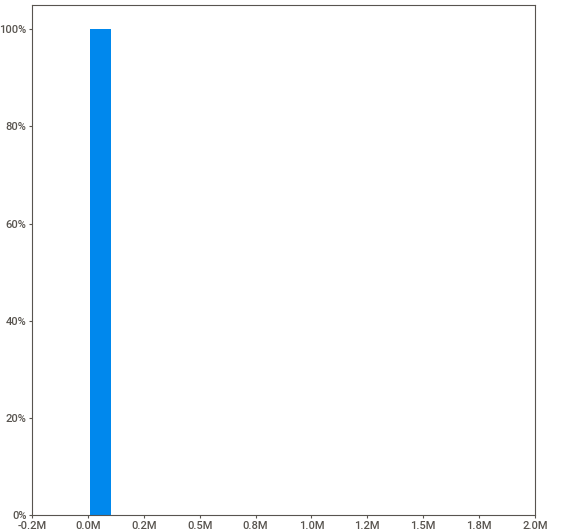
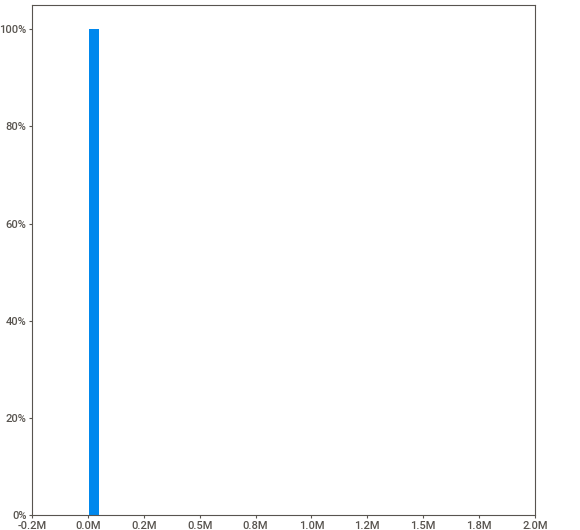
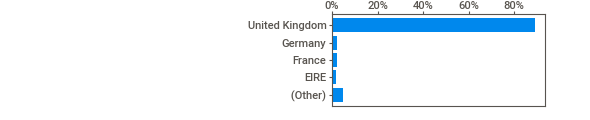
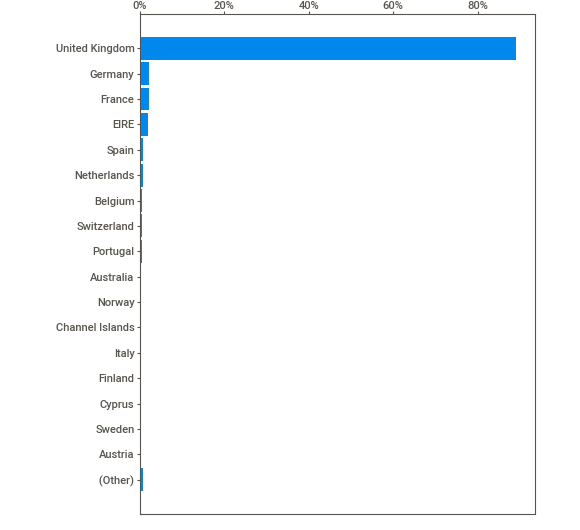
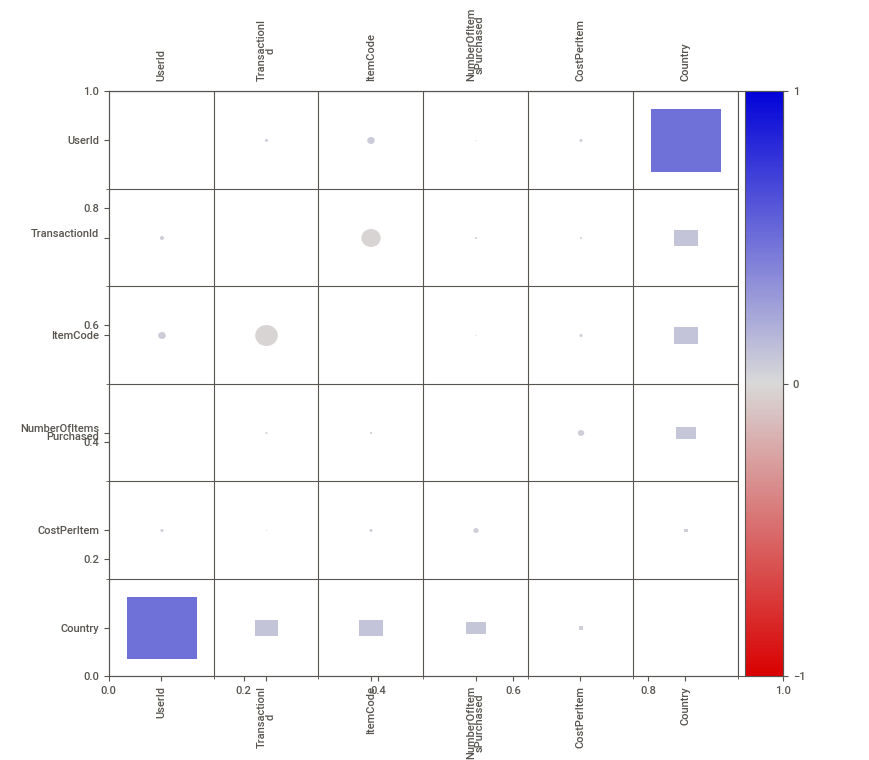
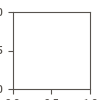

In [258]:
my_report = sv.analyze(source=(df.toPandas(), "EDA Report"))
my_report.show_notebook() # to show in a notebook cell

In [7]:
print("Same TransactionId and ItemCode but different CostPerItem")

df.select(['TransactionId', 'ItemCode', 'CostPerItem'])\
    .drop_duplicates()\
    .groupBy(['TransactionId', 'ItemCode'])\
    .count()\
    .filter(col('count') > 1)\
    .count()
    
# df.filter(col('TransactionID') == 6387997).filter(col('ItemCode') == 464247).show()

Same TransactionId and ItemCode but different CostPerItem


449

In [46]:
# UserId, TransactionId, ItemCode are category id, so I will not find outliers for them. The same for TransactionTime

# Calculate Z-score for CostPerItem and NumberOfItemsPurchased

stats = {}
outlier_candidate_dfs = {}


for column in ['CostPerItem', 'NumberOfItemsPurchased']:
    stats[column] = df.select(mean(col(column)).alias('mean'), stddev(col(column)).alias('stddev')).collect()[0]
    
for column in ['CostPerItem', 'NumberOfItemsPurchased']:
    # filter out outliers with zscore out range [-3,3]
    df = df.withColumn(f'{column}_z_score', (col(column) - stats[column]['mean']) / stats[column]['stddev'])
    outlier_candidate_dfs[column] = df.filter(f'abs({column}_z_score) > 3').drop(f'{column}_z_score')
    df = df.drop(f'{column}_z_score')

outlier_candidate_df = ps.concat(outlier_candidate_dfs.values(), ignore_index=True)

TypeError: cannot concatenate object of type 'list; only ps.Series and ps.DataFrame are valid

[DataFrame[UserId: int, TransactionId: int, TransactionTime: string, ItemCode: int, ItemDescription: string, NumberOfItemsPurchased: int, CostPerItem: double, Country: string],
 DataFrame[UserId: int, TransactionId: int, TransactionTime: string, ItemCode: int, ItemDescription: string, NumberOfItemsPurchased: int, CostPerItem: double, Country: string]]